In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from datetime import datetime 
from scipy.stats import norm
from arch import arch_model
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.distributions.empirical_distribution import ECDF

# Question 1

In [3]:
wind1=pd.read_csv('WindGeneration.csv',sep=',')

In [4]:
wind1=wind1.interpolate(method='linear')
wind1.Time=wind1.Time-1
wind1.dtypes


Date                object
Time                 int64
Wind Generation    float64
dtype: object

In [5]:
wind1['Date']=wind1['Date'].astype(str)
wind1['Time']=wind1['Time'].astype(str)
    

In [6]:
wind1.head()

,Date,Time,Wind Generation
0,01/01/2014,0,1190.1
1,01/01/2014,1,1186.6
2,01/01/2014,2,1174.3
3,01/01/2014,3,1146.7
4,01/01/2014,4,1156.8


In [7]:
wind1['TimeDate']=wind1.Date+wind1.Time

In [8]:
wind1.head()

,Date,Time,Wind Generation,TimeDate
0,01/01/2014,0,1190.1,01/01/20140
1,01/01/2014,1,1186.6,01/01/20141
2,01/01/2014,2,1174.3,01/01/20142
3,01/01/2014,3,1146.7,01/01/20143
4,01/01/2014,4,1156.8,01/01/20144


In [9]:
wind1['TimeDate']=pd.to_datetime(wind1.TimeDate,format ='%d/%m/%Y%H')

In [10]:
wind1.Date=pd.to_datetime(wind1.Date)

In [11]:
wind1.Time=wind1.Time.astype(int)

In [12]:
wind1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             8760 non-null   datetime64[ns]
 1   Time             8760 non-null   int64         
 2   Wind Generation  8760 non-null   float64       
 3   TimeDate         8760 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 273.9 KB


In [13]:
wind1.tail()

,Date,Time,Wind Generation,TimeDate
8755,2014-12-31,19,996.8,2014-12-31 19:00:00
8756,2014-12-31,20,1031.8,2014-12-31 20:00:00
8757,2014-12-31,21,1218.0,2014-12-31 21:00:00
8758,2014-12-31,22,1312.1,2014-12-31 22:00:00
8759,2014-12-31,23,1424.8,2014-12-31 23:00:00


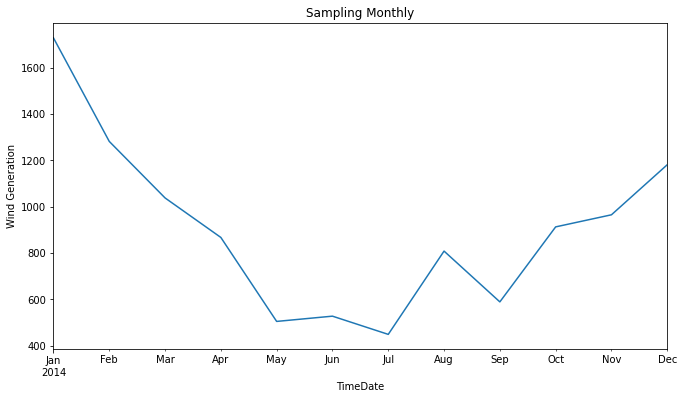

In [14]:
wind1.set_index('TimeDate',inplace=True)
plt.figure(figsize=(11,6))
wind1['Wind Generation'].resample('M').mean().plot()
plt.title('Sampling Monthly')
plt.ylabel('Wind Generation')
plt.show()

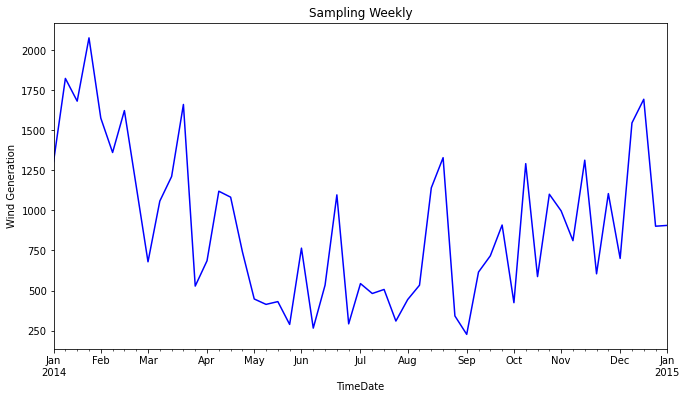

In [15]:
plt.figure(figsize=(11,6))
wind1['Wind Generation'].resample('W').mean().plot(color='b')
plt.title('Sampling Weekly')
plt.ylabel('Wind Generation')
plt.show()

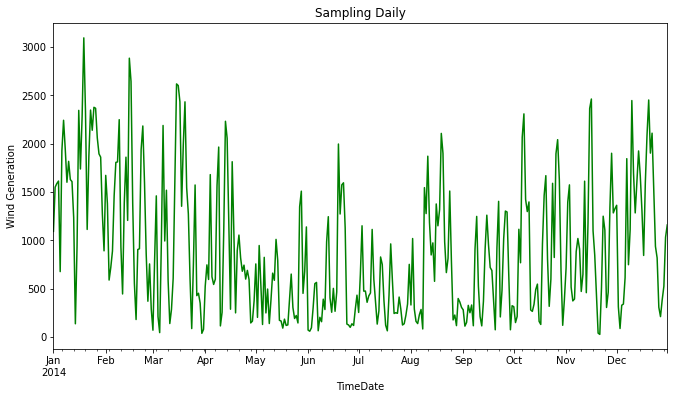

In [16]:
plt.figure(figsize=(11,6))
wind1['Wind Generation'].resample('D').mean().plot(color='g')
plt.ylabel('Wind Generation')
plt.title('Sampling Daily')
plt.show()

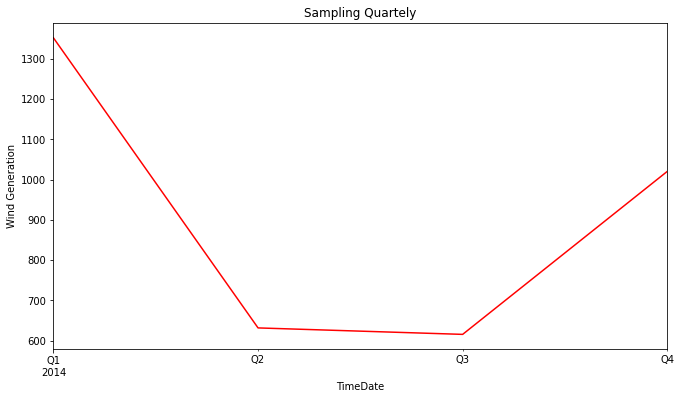

In [17]:
plt.figure(figsize=(11,6))
wind1['Wind Generation'].resample('Q').mean().plot(color='r')
plt.ylabel('Wind Generation')
plt.title('Sampling Quartely')
plt.show()

# Question 2

In [27]:
Fd_val=[]
for i in range(1,len(wind1['Wind Generation'])):
               Fd_val.append(100*(wind1['Wind Generation'][i]-wind1['Wind Generation'][i-1])/mq)
    

In [28]:
mq=np.max(wind1['Wind Generation'])


In [29]:
Ramps=Fd_val

In [30]:
wind1['WindPct']=wind1['Wind Generation'].pct_change()


In [31]:
wind1.isnull().sum()

Date               0
Time               0
Wind Generation    0
WindPct            1
dtype: int64

In [32]:
wind1=wind1.fillna(0)

In [33]:
wind1.head()

,Date,Time,Wind Generation,WindPct
TimeDate,,,,
2014-01-01 00:00:00,2014-01-01,0,1190.1,0.000000
2014-01-01 01:00:00,2014-01-01,1,1186.6,-0.002941
2014-01-01 02:00:00,2014-01-01,2,1174.3,-0.010366
2014-01-01 03:00:00,2014-01-01,3,1146.7,-0.023503
2014-01-01 04:00:00,2014-01-01,4,1156.8,0.008808


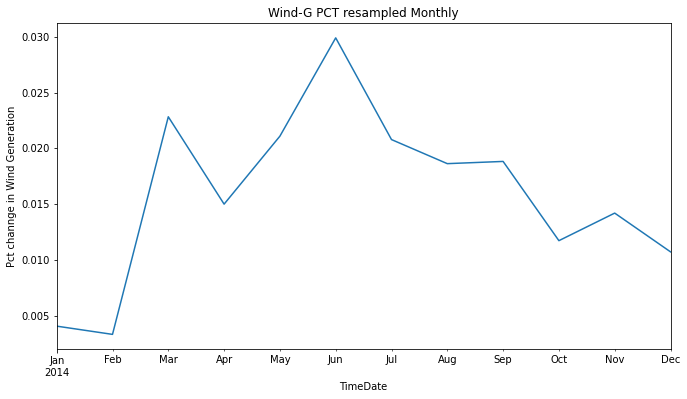

In [34]:
plt.figure(figsize=(11,6))
wind1['WindPct'].resample('M').mean().plot()
plt.ylabel('Pct channge in Wind Generation')
plt.title('Wind-G PCT resampled Monthly')
plt.show()

# Question 3

In [35]:
postVal=[x for x in Ramps if x > 0]
negVal=[x for x in Ramps if x < 0]

In [36]:
postValx=pd.DataFrame(data=postVal,columns=['postVal'])

In [37]:

negValx=pd.DataFrame(data=negVal,columns=['negVal'])

In [38]:
postValx.sort_values(by=['postVal'],ascending=True,inplace=True)
negValx.sort_values(by=['negVal'],ascending=True,inplace=True)

<AxesSubplot:>

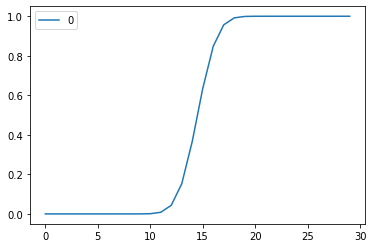

In [39]:
negValues=norm.cdf(negValx.negVal)
posValues=norm.cdf(postValx.postVal)
xp=np.linspace(-30,30,30)
std=np.std(Ramps)
pdf=norm.cdf(xp,0,std)
pdf_=pd.DataFrame(data=pdf)
pdf_.plot()

In [40]:
positve=ECDF(postValx.postVal)
negative=ECDF(negValx.negVal)


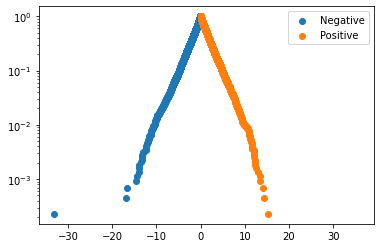

In [43]:
plt.yscale('log')

plt.scatter(negative.x,negative.y)
plt.scatter(positve.x,1-positve.y)
plt.legend(['Negative','Positive'])

plt.show()

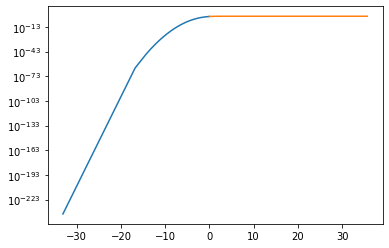

In [44]:
plt.yscale('log')
plt.plot(negValx.negVal,negValues)
plt.plot(postValx.postVal,posValues)

# Question 4

In [45]:
wind1.head()

,Date,Time,Wind Generation,WindPct
TimeDate,,,,
2014-01-01 00:00:00,2014-01-01,0,1190.1,0.000000
2014-01-01 01:00:00,2014-01-01,1,1186.6,-0.002941
2014-01-01 02:00:00,2014-01-01,2,1174.3,-0.010366
2014-01-01 03:00:00,2014-01-01,3,1146.7,-0.023503
2014-01-01 04:00:00,2014-01-01,4,1156.8,0.008808


In [46]:
Quant=[]
for x in range(1,25):
    wind1["Percent"] = 100 * (
    wind1["Wind Generation"].diff(periods=x)
    .fillna(0) / np.max(wind1["Wind Generation"]))
    Quant.append(wind1["Percent"].quantile([.1,.5,.95,.99]))
    


In [47]:
Quantx=pd.DataFrame(data=Quant)
Quantx.columns

Float64Index([0.1, 0.5, 0.95, 0.99], dtype='float64')

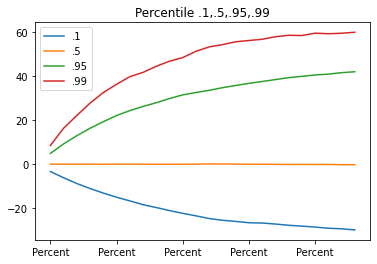

In [48]:
Quantx[0.1].plot()
Quantx[0.5].plot()
Quantx[0.95].plot()
Quantx[0.99].plot()
plt.title('Percentile .1,.5,.95,.99')
plt.legend(['.1','.5','.95','.99'])

# Question 5

In [49]:
auto_corr=data=wind1['Wind Generation'].autocorr(lag=240)
auto_corr

0.15740697379208002

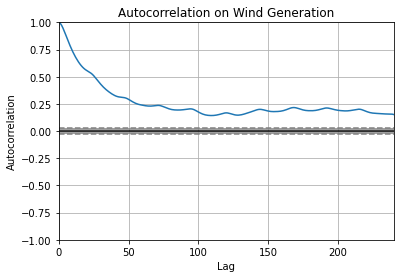

In [50]:
pd.plotting.autocorrelation_plot(wind1['Wind Generation']).set_xlim([0,240])
plt.title('Autocorrelation on Wind Generation')
plt.show()

# Question 6

In [51]:
wind1.head()

,Date,Time,Wind Generation,WindPct,Percent
TimeDate,,,,,
2014-01-01 00:00:00,2014-01-01,0,1190.1,0.000000,0.0
2014-01-01 01:00:00,2014-01-01,1,1186.6,-0.002941,0.0
2014-01-01 02:00:00,2014-01-01,2,1174.3,-0.010366,0.0
2014-01-01 03:00:00,2014-01-01,3,1146.7,-0.023503,0.0
2014-01-01 04:00:00,2014-01-01,4,1156.8,0.008808,0.0


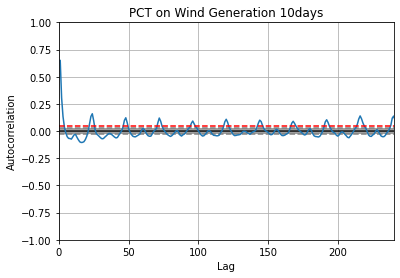

In [52]:
pd.plotting.autocorrelation_plot(wind1['WindPct']).set_xlim([0,240])
plt.axhline(y=0.05,color='r',linestyle='--')

plt.title('PCT on Wind Generation 10days')
plt.show()

# Question 7

In [53]:

Val=100* (wind1['Wind Generation'].pct_change().dropna())
model=arch_model(Val)
res=model.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     30,   Neg. LLF: 35156.63817593686
Iteration:     10,   Func. Count:     55,   Neg. LLF: 35158.699829930214
Optimization terminated successfully    (Exit mode 0)
            Current function value: 35156.21964074997
            Iterations: 11
            Function evaluations: 59
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:        Wind Generation   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -35156.2
Distribution:                  Normal   AIC:                           70320.4
Method:            Maximum Likelihood   BIC:                           70348.8
                                        No. Observations:                 8759
Date:                Mon, Mar 01 2021   Df Residuals:                     8758
Time:                        20:41:22   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2993      0.223      1.339      0.180 [ -0.139,  0.737]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega         11.5127      7.476      1.540      0.124 [ -3.141, 26.166]
alpha[1]       0.4391  5.461e-02      8.040  8.970e-16 [  0.332,  0.546]
beta[1]        0.5609  9.708e-02      5.778  7.556e-09 [  0.371,  0.751]
========================================================================

Covariance estimator: robust
"""

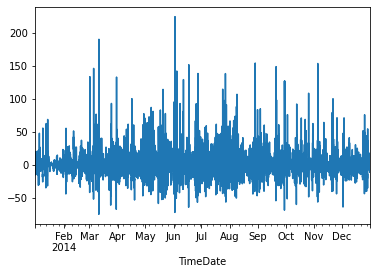

In [54]:
ax=Val.plot()
xlim = ax.set_xlim(Val.index.min(), Val.index.max())

In [55]:
adf_result=adfuller(wind1['Wind Generation'])
print('ADF resuslt{}'.format(adf_result[0]))
print('ADF P-value{}'.format(adf_result[1]))
print('Critical values')
for key,value in adf_result[4].items():
    print(key,value)

ADF resuslt-9.507227276824727
ADF P-value3.322198217670297e-16
Critical values
1% -3.4310990236088363
5% -2.8618710185907106
10% -2.566946196227356


# Question 8

In [56]:
MAE=[]
for x in range(1,25):
    roll=wind1['Wind Generation'].rolling(x,win_type='triang').mean().fillna(0)
    MAE.append(mean_absolute_error(roll,wind1['Wind Generation']))
    
    

In [57]:
min(MAE)

0.0

# Question 9

In [58]:
Mae=[]
for i in range(1,25):
    rollx=wind1['Wind Generation'].shift(periods=i).fillna(0)
    Mae.append(100*mean_absolute_error(rollx,wind1['Wind Generation']))
    

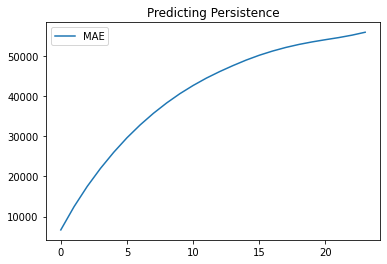

In [59]:
pd.DataFrame(data=Mae).plot()
plt.title('Predicting Persistence')
plt.legend(['MAE'])
plt.show()

In [60]:
min(Mae)

6662.908675799086

In [61]:
import warnings
warnings.filterwarnings('ignore')


# Question 10

In [ ]:
BIC=[]
AIC=[]
for x in range(1,5):
    model_arima=ARIMA(wind1['Wind Generation'],order=(x,1,x))
    model_fit=model_arima.fit()
    BIC.append(model_fit.bic)
    AIC.append(model_fit.aic)

In [ ]:
BIC

In [ ]:
min(BIC)

In [ ]:
AIC

In [ ]:
min(AIC)